In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data  = pd.read_csv("./data/train.csv",index_col='Id')
test = pd.read_csv("./data/test.csv",index_col='Id')



In [19]:
y = data['count']

X = data.drop(['count'],axis=1).select_dtypes(exclude=['object'])

from sklearn.model_selection  import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
X.describe()


(1167, 10) (1167,)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000


<AxesSubplot:>

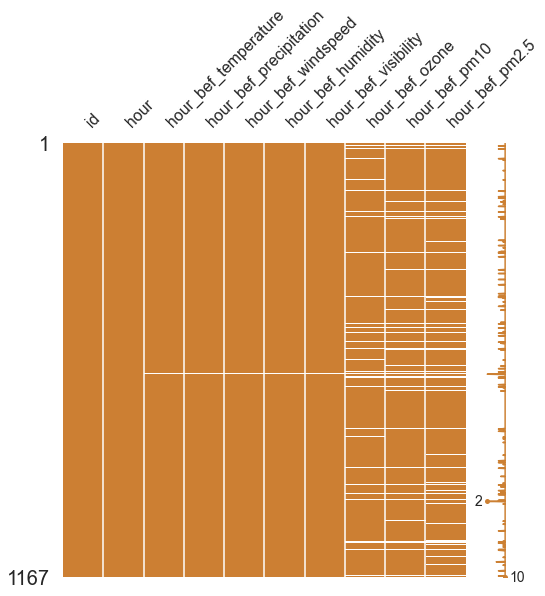

In [20]:
msno.matrix(df=X_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

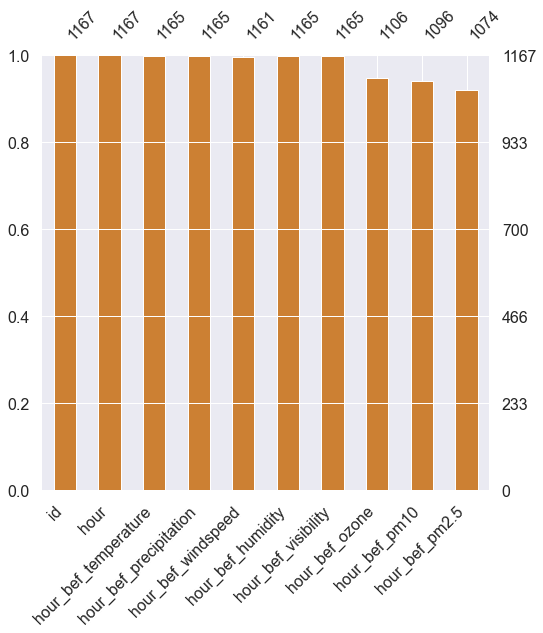

In [9]:
msno.bar(df=X_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', XGBRegressor(n_estimators=1000,learning_rate=0.005,n_job=4))
])


In [36]:
my_pipeline.fit(X_train, y_train)
pred = my_pipeline.predict(X_valid)

from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_valid, pred)

[20:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [37]:
print(score)

23.91293007380342


In [38]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [35]:
pred_test = my_pipeline.predict(test)
output = pd.DataFrame({'id': test.id, 'count':pred_test})
output.to_csv("./out/submission.csv",index=False)